In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [150]:
data1= {'x1':[0.346,0.303,0.358,0.602,0.790,0.611],'x2':[0.780,0.439,0.729,0.863,0.753,0.965],'y':[0,0,0,1,1,1]}
train_df=pd.DataFrame(data1)
train_df

,x1,x2,y
0,0.346,0.780,0
1,0.303,0.439,0
2,0.358,0.729,0
3,0.602,0.863,1
4,0.790,0.753,1
5,0.611,0.965,1


In [151]:
data2= {'x1':[0.959,0.750,0.395,0.823,0.761,0.844],'x2':[0.382,0.306,0.760,0.764,0.874,0.435],'y':[0,0,0,1,1,1]}
test_df=pd.DataFrame(data2)
test_df

,x1,x2,y
0,0.959,0.382,0
1,0.750,0.306,0
2,0.395,0.760,0
3,0.823,0.764,1
4,0.761,0.874,1
5,0.844,0.435,1


### Visualizing training dataframe and testing dataframe

Training data:

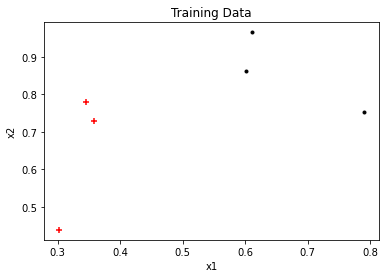

In [152]:
from matplotlib import pyplot as plt
df1=train_df.loc[train_df['y']==0]
df2=train_df.loc[train_df['y']==1]
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data')
plt.scatter(df1['x1'], df1['x2'],color="red",marker='+')
plt.scatter(df2['x1'], df2['x2'],color="black",marker='.')

Intuitively, a line can easily fit in between the two classes and hence the training error is expected to be zero

Testing Data

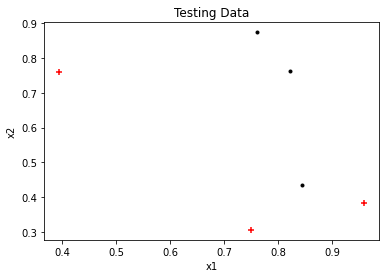

In [153]:
df11=test_df.loc[test_df['y']==0]
df22=test_df.loc[test_df['y']==1]
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Testing Data')
plt.scatter(df11['x1'], df11['x2'],color="red",marker='+')
plt.scatter(df22['x1'], df22['x2'],color="black",marker='.')

In [154]:
y_train=train_df['y']
y_train=y_train.values
y_train

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [155]:
X_train=train_df.drop(columns=['y'])
X_train=X_train.to_numpy()
X_train

array([[0.346, 0.78 ],
       [0.303, 0.439],
       [0.358, 0.729],
       [0.602, 0.863],
       [0.79 , 0.753],
       [0.611, 0.965]])

In [156]:
y_test=test_df['y']
y_test=y_test.values
X_test=test_df.drop(columns=['y'])
X_test=X_test.to_numpy()

In [157]:
X_train = X_train.T

In [158]:
X_train.shape

(2, 6)

In [159]:
y_train = y_train.reshape(1, X_train.shape[1])

In [160]:
y_train.shape

(1, 6)

In [161]:
X_test = X_test.T
X_test.shape

(2, 6)

In [162]:
y_test = y_test.reshape(1, X_test.shape[1])
y_test.shape

(1, 6)

In [163]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (2, 6)
Shape of Y_train :  (1, 6)
Shape of X_test :  (2, 6)
Shape of Y_test :  (1, 6)


### Model Building

In [164]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [165]:
def LogisticReg(X_train, Y_train, lr, n_iter):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    lamda=0.01 #reguralizer
    
    W = np.zeros((n,1))
    b = 0
    
    cost_list = []
    
    for i in range(n_iter):
        
        Z = np.dot(W.T, X_train) + b
        pred = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y_train*np.log(pred) + (1-Y_train)*np.log(1-pred))
        
        # Gradient Descent
        dW = (1/m)*np.dot(pred-Y_train, X_train.T)
        db = (1/m)*np.sum(pred - Y_train)
        
        W = W - lr*dW.T-(lamda*W)
        b = b - lr*db
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(n_iter/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, b, cost_list

In [166]:
iterations = 10000
learning_rate = 0.1
W, b, cost_list = LogisticReg(X_train, y_train, lr = learning_rate, n_iter = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  1000 iteration is :  0.6106527723513464
cost after  2000 iteration is :  0.6104044597466715
cost after  3000 iteration is :  0.6104033366554189
cost after  4000 iteration is :  0.61040333156405
cost after  5000 iteration is :  0.6104033315409688
cost after  6000 iteration is :  0.6104033315408646
cost after  7000 iteration is :  0.6104033315408646
cost after  8000 iteration is :  0.6104033315408646
cost after  9000 iteration is :  0.6104033315408646


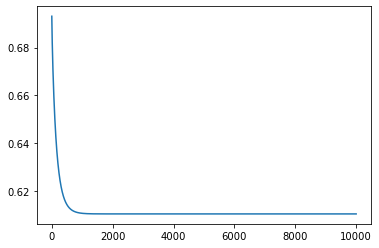

In [167]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [168]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    pred = sigmoid(Z)
    
    pred = pred > 0.5 #This returns bool
    
    pred = np.array(pred, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(pred - Y))/Y.shape[1])*100
    
    return acc

In [169]:
def prediction(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    pred = sigmoid(Z)
    
    pred = pred > 0.5 #This returns bool
    
    pred = np.array(pred, dtype = 'int64')
    
    return pred

In [170]:
print("The train accuracy in % is: ",accuracy(X_train, y_train, W, b))
print("The test accuracy in % is: ",accuracy(X_test, y_test, W, b))

The train accuracy in % is:  100.0
The test accuracy in % is:  83.33333333333334


### 5b

In [171]:
def LogisticReg1(X_train, Y_train, lr, n_iter):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    lamda=0.01 #regularizer
    
    W = np.array([[1.5],[0.5]]) #initializing weights with 1.5 and 0.5 as given in question
    b = -1 
    
    cost_list = []
    
    for i in range(n_iter):
        
        Z = np.dot(W.T, X_train) + b
        pred = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y_train*np.log(pred) + (1-Y_train)*np.log(1-pred))
        
        # Gradient Descent
        dW = (1/m)*np.dot(pred-Y_train, X_train.T)
        db = (1/m)*np.sum(pred - Y_train)
        
        W = W - lr*dW.T-(lamda*W)
        b = b - lr*db
        
        if(i==0):
            W_iter1=W
            b_iter1=b
            print("Θ1 and Θ2 after first iteration is: ",W_iter1[0],W_iter1[1])
            print("Θ0 after the first iteration is: ",b_iter1)
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(n_iter/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, b,cost_list

In [172]:
arr= np.array([[1],[2]])
arr.shape

(2, 1)

In [173]:
iterations = 10000
learning_rate = 0.1
W1, b1, cost_list = LogisticReg1(X_train, y_train, lr = learning_rate, n_iter = iterations)

Θ1 and Θ2 after first iteration is:  [1.49035086] [0.49696867]
Θ0 after the first iteration is:  -1.0031662597725644
cost after  0 iteration is :  0.5569500797547651
cost after  1000 iteration is :  0.6102913998434697
cost after  2000 iteration is :  0.6104028271006632
cost after  3000 iteration is :  0.6104033292541154
cost after  4000 iteration is :  0.6104033315304968
cost after  5000 iteration is :  0.6104033315408166
cost after  6000 iteration is :  0.6104033315408623
cost after  7000 iteration is :  0.6104033315408623
cost after  8000 iteration is :  0.6104033315408623
cost after  9000 iteration is :  0.6104033315408623


In [174]:
print("The test accuracy in % is: ",accuracy(X_test, y_test, W1, b1))

The test accuracy in % is:  83.33333333333334


In [175]:
from sklearn.metrics import precision_score, recall_score
pred=prediction(X_test, y_test, W1, b1)
y_pred=pred[0]
y_pred = y_pred.reshape(1, X_train.shape[1])
y_pred=y_pred.T
y_test=y_test.T
ps=precision_score(y_test,y_pred)
rs=recall_score(y_test,y_pred)
print("Precision: ",ps,"Recall: ",rs)

Precision:  0.75 Recall:  1.0
